https://blog.csdn.net/qq_43627540/article/details/107667298
# 初始化


In [2]:
import pycaret
use_gpu = True
# 初始化 获取数据 
from pycaret.datasets import get_data
diabetes = get_data('diabetes')



,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


,Description,Value
0,Session id,4140
1,Target,Class variable
2,Target type,Binary
3,Original data shape,"(768, 9)"
4,Transformed data shape,"(768, 9)"
5,Transformed train set shape,"(537, 9)"
6,Transformed test set shape,"(231, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


# 建立环境 
主要看setup函数  可以做到
1. 数据规范化与转换
2. 特征工程
3. 缺失值处理
4. 编码
5. 采样拆分

In [3]:
# 建立环境 
# 初始化 参数约束了数据集和目标变量
from pycaret.classification import *
clf1 = setup(data = diabetes, 
             target = 'Class variable', # 约束目标
             polynomial_features="False")

,Description,Value
0,Session id,5954
1,Target,Class variable
2,Target type,Binary
3,Original data shape,"(768, 9)"
4,Transformed data shape,"(768, 45)"
5,Transformed train set shape,"(537, 45)"
6,Transformed test set shape,"(231, 45)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


# 模型建立
比较
集成

In [4]:

compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.7486,0.0000,0.4927,0.7122,0.5724,0.4050,0.4244,0.0060
lda,Linear Discriminant Analysis,0.7468,0.7993,0.4980,0.7003,0.5740,0.4031,0.4193,0.0060
rf,Random Forest Classifier,0.7450,0.8117,0.5424,0.6800,0.5908,0.4125,0.4255,0.0320
gbc,Gradient Boosting Classifier,0.7433,0.8086,0.5737,0.6587,0.6052,0.4184,0.4257,0.0650
lr,Logistic Regression,0.7357,0.7757,0.4830,0.6941,0.5572,0.3792,0.3990,0.3810
ada,Ada Boost Classifier,0.7302,0.7881,0.5480,0.6354,0.5790,0.3852,0.3938,0.0220
lightgbm,Light Gradient Boosting Machine,0.7264,0.7964,0.5795,0.6232,0.5894,0.3878,0.3953,0.0470
et,Extra Trees Classifier,0.7208,0.8033,0.5216,0.6285,0.5568,0.3598,0.3713,0.0260
qda,Quadratic Discriminant Analysis,0.7187,0.7537,0.5515,0.6194,0.5772,0.3688,0.3746,0.0060
nb,Naive Bayes,0.7133,0.7797,0.5249,0.6108,0.5591,0.3495,0.3553,0.0050


RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=5954, solver='auto',
                tol=0.0001)

In [5]:
# 创建逻辑回归模型
ridge = create_model('ridge')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7593,0.0000,0.4737,0.7500,0.5806,0.4236,0.4456
1,0.7778,0.0000,0.6842,0.6842,0.6842,0.5128,0.5128
2,0.7407,0.0000,0.3684,0.7778,0.5000,0.3538,0.3989
3,0.7778,0.0000,0.4737,0.8182,0.6000,0.4609,0.4939
4,0.7037,0.0000,0.3158,0.6667,0.4286,0.2615,0.2948
5,0.7037,0.0000,0.5789,0.5789,0.5789,0.3504,0.3504
6,0.7593,0.0000,0.4211,0.8000,0.5517,0.4081,0.4474
7,0.7925,0.0000,0.5556,0.7692,0.6452,0.5038,0.5172
8,0.7736,0.0000,0.5556,0.7143,0.6250,0.4664,0.4740


In [ ]:
# 调优和集成
# 调节 LR 模型
tuned_lr = tune_model('lr')
# 创建一个决策树模型
dt = create_model('dt')
dt_bagged = ensemble_model(dt,
                        method='Boosting')# 默认bagging方法 设置method可以转换为boosting

## 集成学习
boosting提升方法 线性组合 源于PAC理论
1.Boosting方法：包括Adaboosting，提升树（代表是GBDT）, XGBoost等
2.Bagging方法：典型的是随机森林
3.Stacking算法
### 比较复杂的集成方法estimator_list参数

### meta_model
1. `lightgbm`：LightGBM 是一个梯度提升框架，通常与基本模型一起使用来构建堆叠模型。它具有高性能和效率。

2. `catboost`：CatBoost 是另一个梯度提升框架，专为分类问题设计。它可以处理分类特征，适用于分类任务。

3. `random_forest`：随机森林是一种集成学习算法，也可以作为元模型使用。它适用于多种类型的问题。

4. `et` 或 `extra_trees`：Extra Trees（极端随机树）是随机森林的一种变种，也可以作为元模型使用。

5. `lr` 或 `logistic_regression`：逻辑回归是一个线性模型，也可以用作元模型。它适用于二进制分类问题。

6. `ridge`：岭回归是一种线性模型，适用于回归问题。

7. `svm`：支持向量机（SVM）是一种强大的模型，适用于分类和回归问题。

8. `knn` 或 `k_nearest_neighbors`：k-最近邻（KNN）是一种基于距离的模型，适用于分类和回归问题。

9. `rf` 或 `rf`：随机森林，与 `random_forest` 相同。

您可以根据您的数据和问题类型选择适当的元模型。每个元模型都有其自己的优点和适用性，因此选择取决于您的具体需求和实验结果。

In [ ]:
# blend_models 混合特殊的模型
# blender = blend_models(estimator_list = [dt, catboost, lightgbm])

# 创建单个模型，用于stacking
ridge = create_model('ridge')
lda = create_model('lda')
gbc = create_model('gbc')
xgboost = create_model('xgboost')
# stacking 模型
stacker = stack_models(estimator_list = [ridge,lda,gbc], meta_model = xgboost)

# 模型绘制 

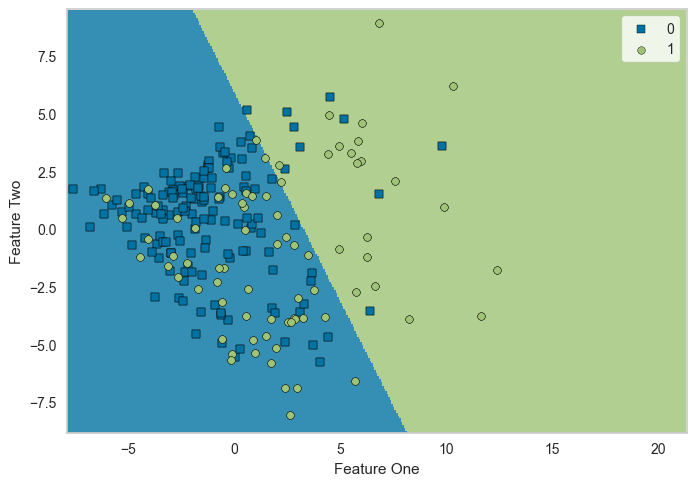

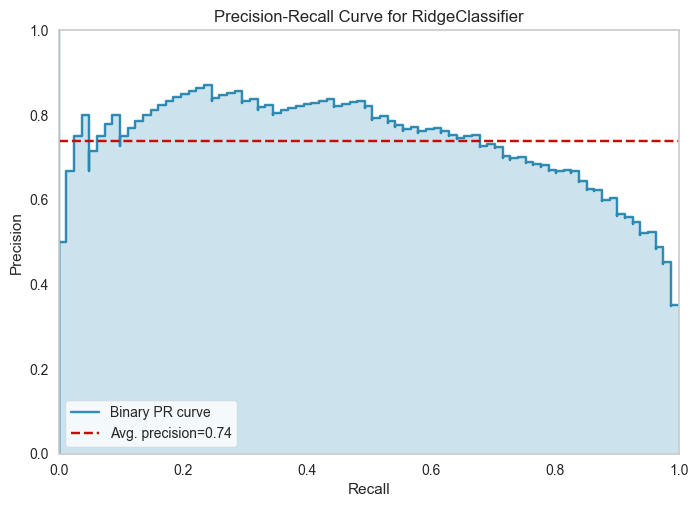

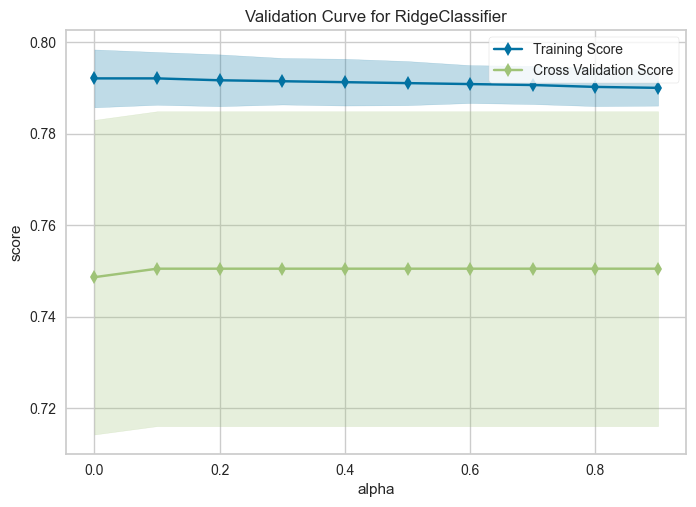

In [8]:


# 可视化模型性能 - AUC 曲线
# plot_model(ridge, plot='auc')
# AUC（Area Under the Curve）曲线用于评估模型的二进制分类性能，显示了不同阈值下的真正例率与假正例率之间的权衡关系。

# 可视化模型的决策边界
plot_model(ridge, plot='boundary')
# 决策边界展示了模型如何将样本分为两个类别的分界线，有助于理解模型的分类决策。

# 可视化精确度-召回率曲线
plot_model(ridge, plot='pr')
# 精确度-召回率曲线显示了模型在不同阈值下的精确度和召回率之间的权衡关系，用于评估分类性能。

# 可视化验证曲线
plot_model(ridge, plot='vc')
# 验证曲线有助于了解模型性能如何随着超参数的变化而变化，通常用于调整超参数以获得更好的性能。


# 模型解释
shapley值  某种模型解释工具
reason图


# 模型部署
所以只要使用模型就叫模型部署了吗